# Compare clustering methods — LEMON (PCA)

Load `dataset/LEMON_pca.csv` and run `functions.compare_clusters.compare_clusters`.

In [1]:
import pandas as pd
from functions.compare_clusters import compare_clusters, CompareConfig, ClusterConfig
from functions.feature_preprocessing import load_preprocessed_data


Running KMeans...
  Auto-detecting optimal k using silhouette...
  Optimal k: 2
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.2094
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     1.7218
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  56.7888
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  17211.3830
    Lower is better
  Cluster Compactness:
    Cluster 0: 9.0679
    Cluster 1: 9.5496

  Clusters found: 2

Running Agglomerative...
  Auto-detecting optimal n using silhouette...
  Optimal n: 2
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.2148
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     1.7133
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  53.8279
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  17422.1166
    Lower is better
  Cluster Compactness:
    Cluster 0:

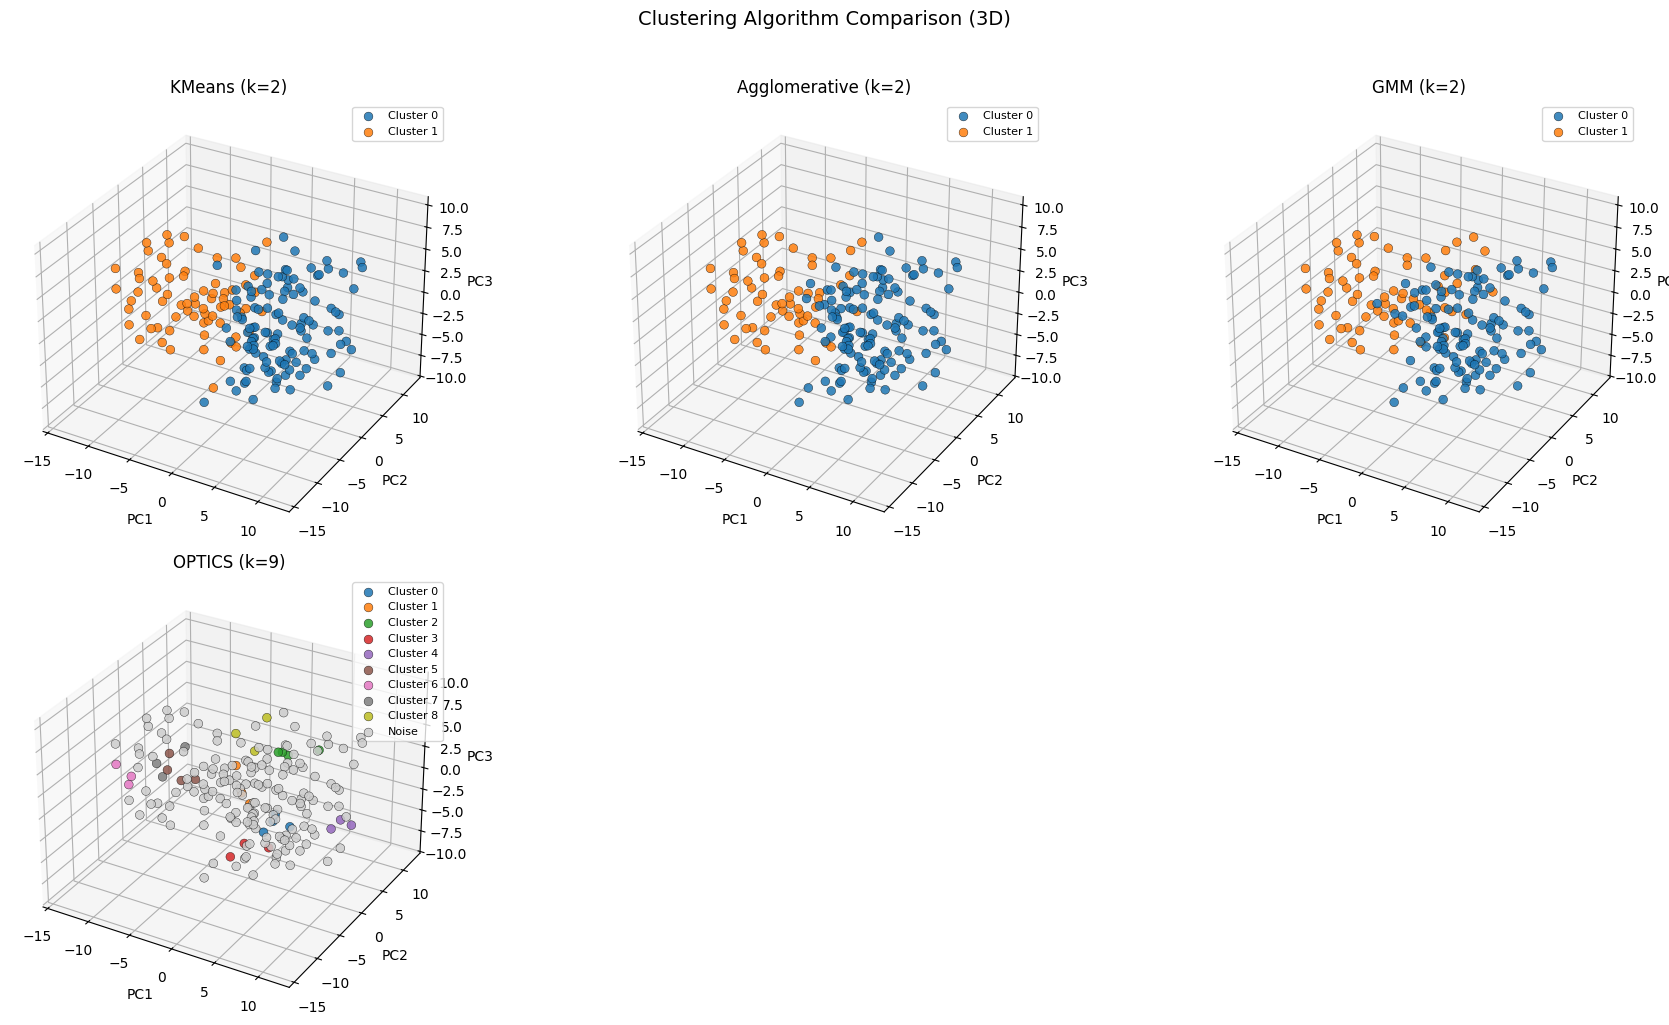

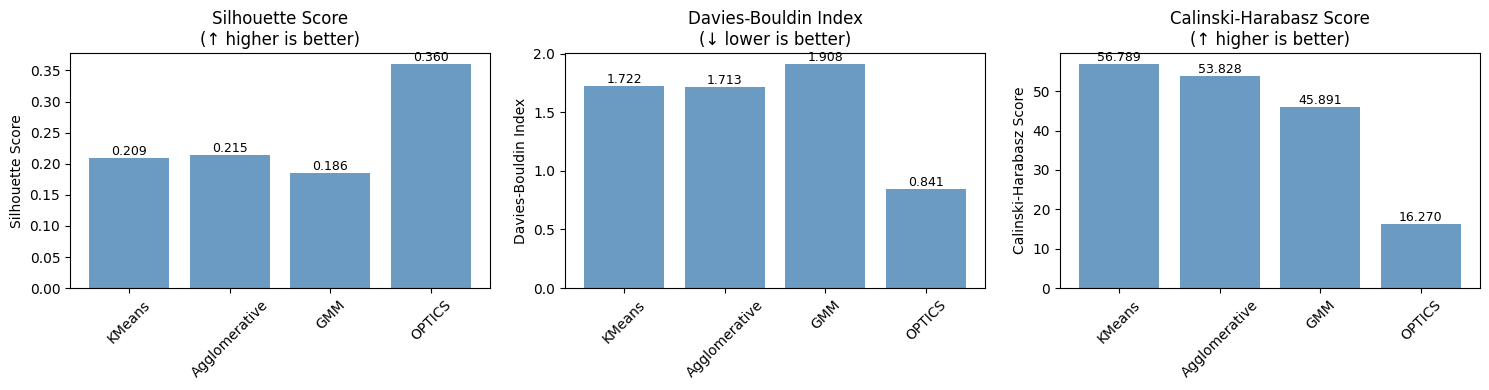

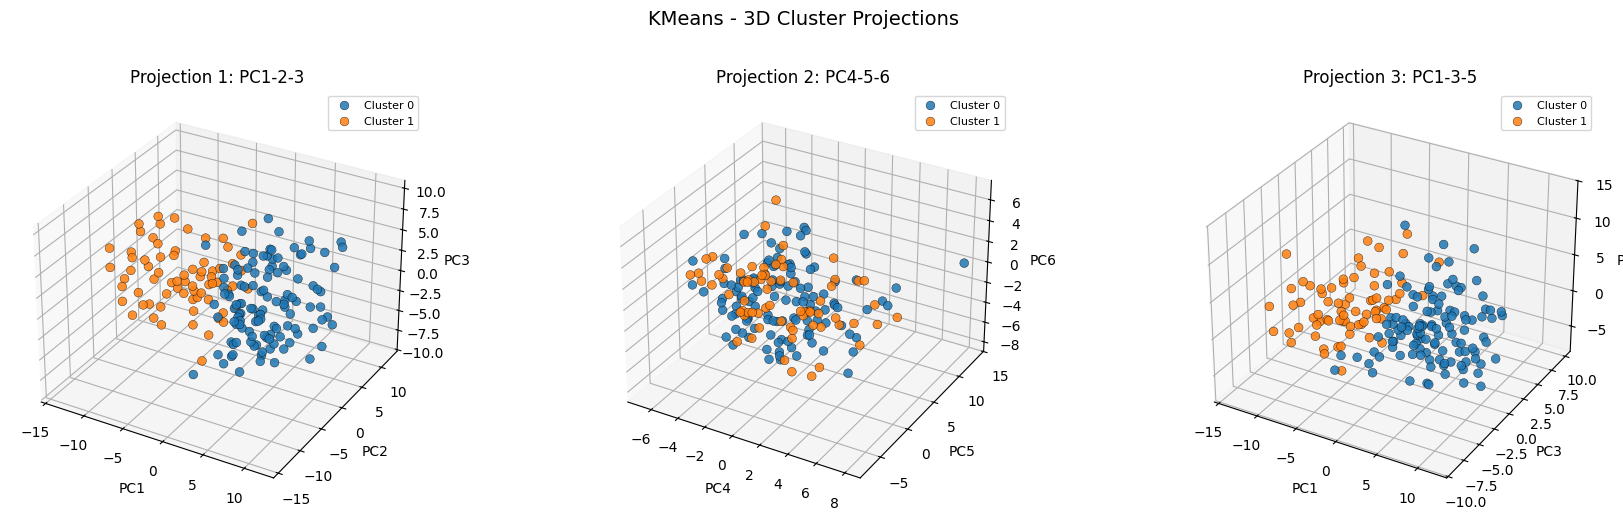

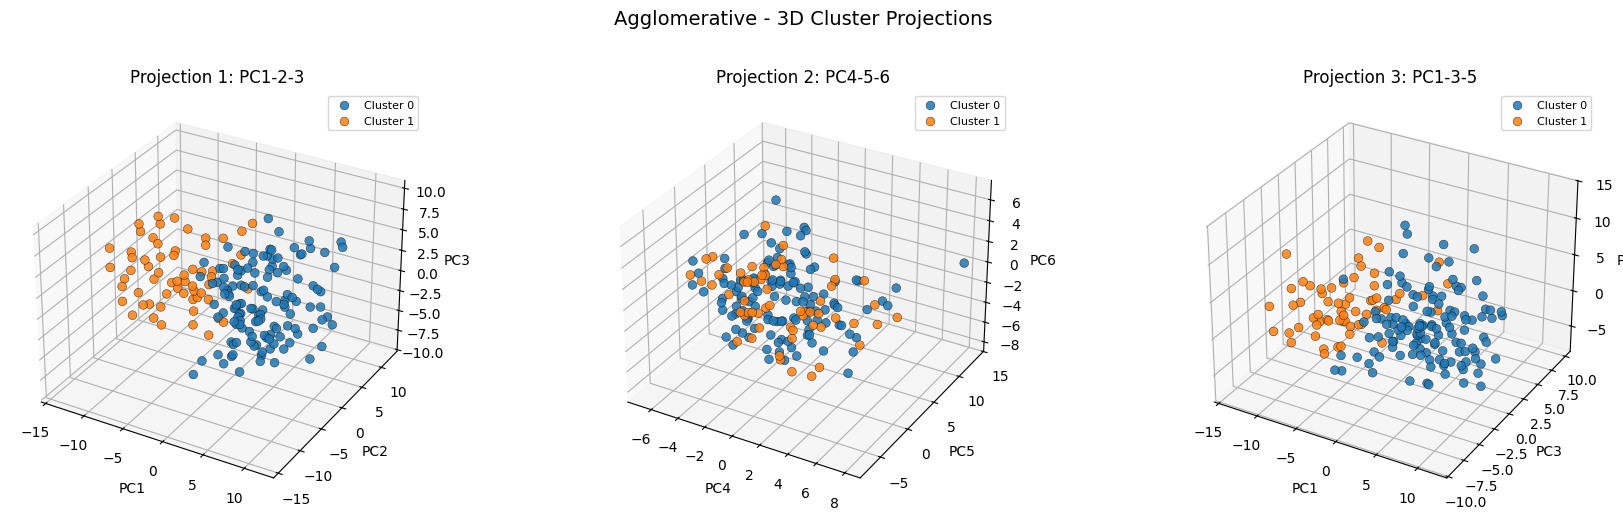

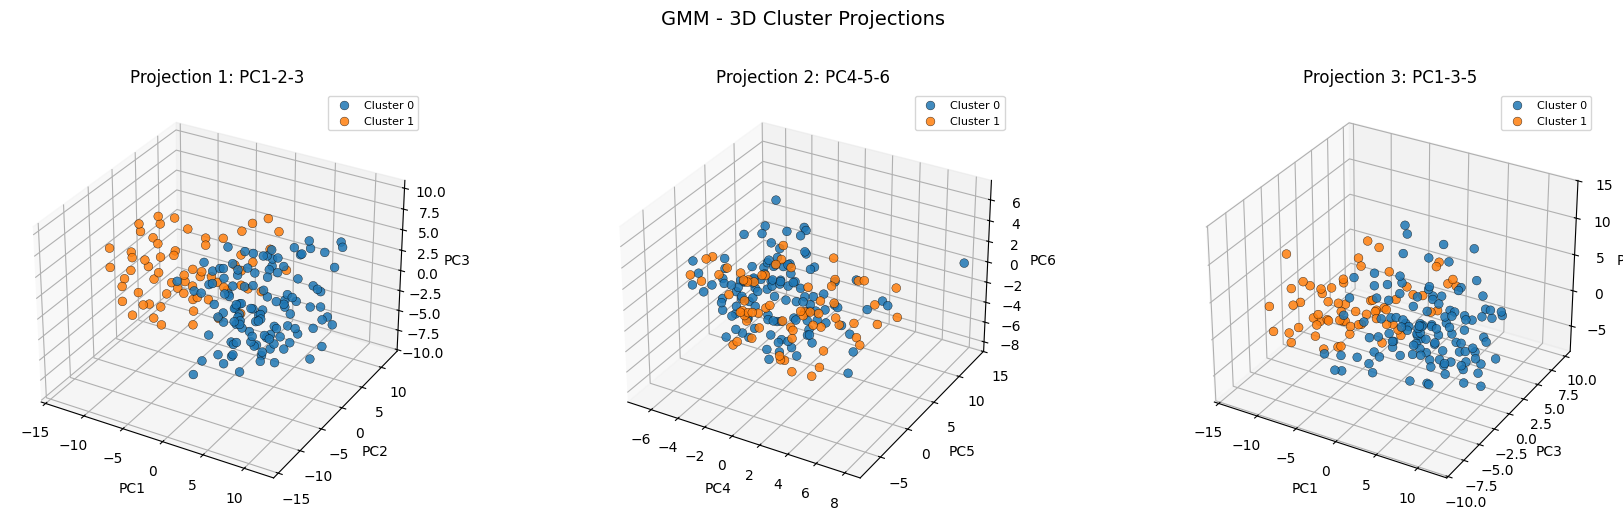

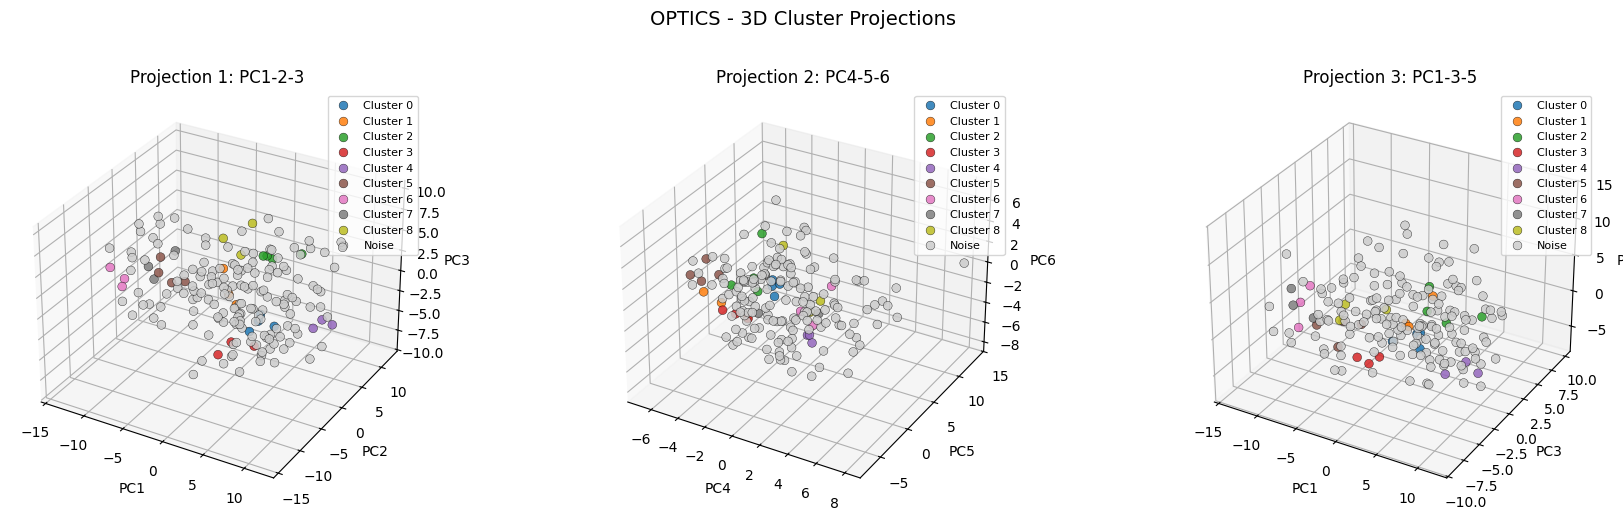


Summary Comparison
       Algorithm  Clusters  Noise Points Silhouette Davies-Bouldin Calinski-Harabasz
0         KMeans         2             0     0.2094         1.7218             56.79
1  Agglomerative         2             0     0.2148         1.7133             53.83
2            GMM         2             0     0.1858         1.9078             45.89
3         OPTICS         9           160     0.3598         0.8414             16.27


"\nfor name, res in results.items():\n    labels = res['labels']\n    out = pd.DataFrame({'label': labels}, index=X.index)\n    out.to_csv(f'dataset/{name}_Dortmund_preprocessed_labels.csv')\n "

In [2]:
data, features, subject_ids  = load_preprocessed_data('dataset/LEMON_pca.csv')

config = CompareConfig(visualize_3d=True)

results = compare_clusters(data, config=config, feature_names=list(data.columns), verbose=True)

# optional save of cluster labels
"""
for name, res in results.items():
    labels = res['labels']
    out = pd.DataFrame({'label': labels}, index=X.index)
    out.to_csv(f'dataset/{name}_Dortmund_preprocessed_labels.csv')
 """


# External Metrics

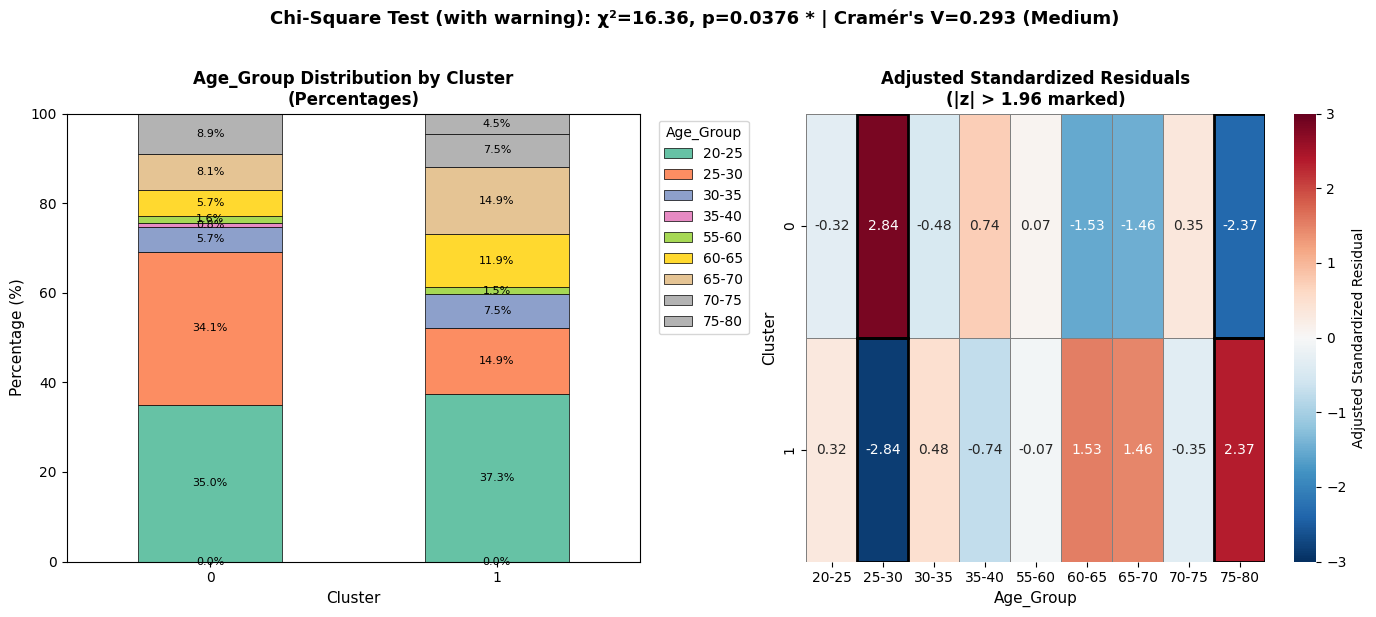


SUMMARY Categorical Analysis
Test used: Chi-Square Test (with warning)
Result: SIGNIFICANT (p=0.0376)
Significant associations:
  ↑ 0 has over 25-30 (z=2.84)
  ↓ 0 has under 75-80 (z=-2.37)
  ↓ 1 has under 25-30 (z=-2.84)
  ↑ 1 has over 75-80 (z=2.37)
Effect size: Cramér's V = 0.2934 (Medium)


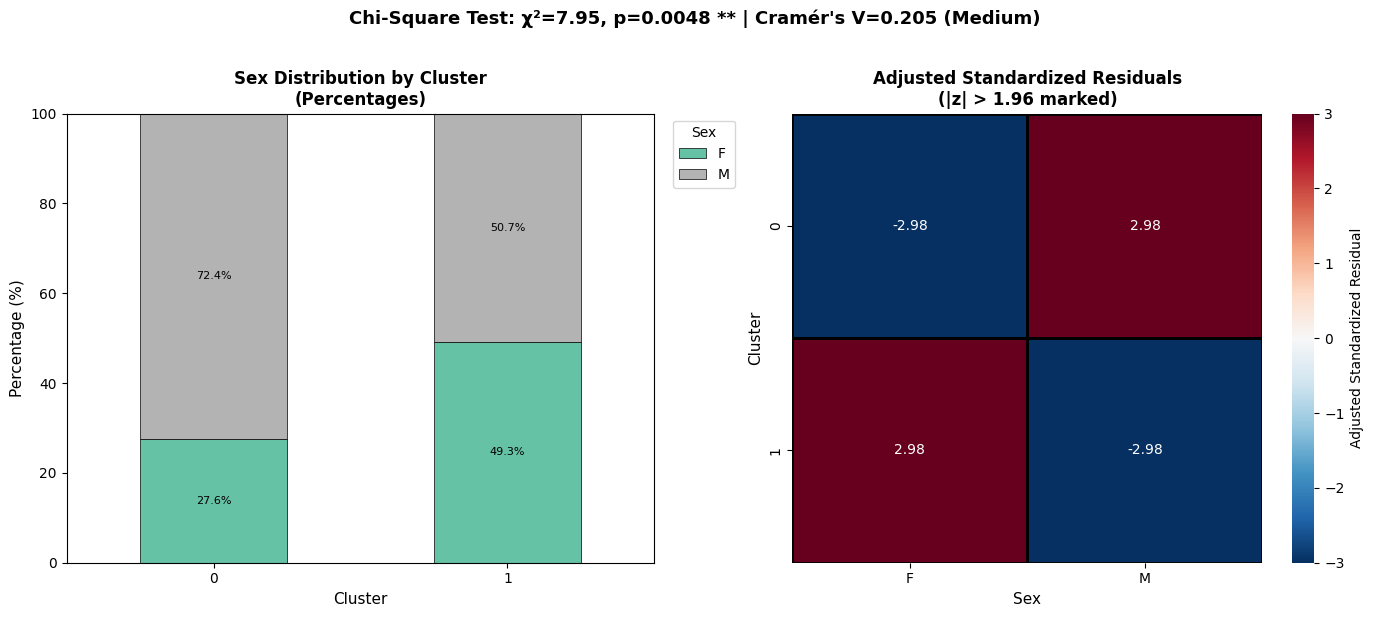


SUMMARY Categorical Analysis
Test used: Chi-Square Test
Result: SIGNIFICANT (p=0.0048)
Significant associations:
  ↓ 0 has under F (z=-2.98)
  ↑ 0 has over M (z=2.98)
  ↑ 1 has over F (z=2.98)
  ↓ 1 has under M (z=-2.98)
Effect size: Cramér's V = 0.2046 (Medium)


In [7]:
from metrics.external_metrics import analyze_continuous_variable, analyze_categorical_variable, load_external_variables

# Load external variables
age_group, sex = load_external_variables("dataset/Lemon_age&sex.csv", subject_ids=subject_ids)

# Cluster Names ['KMeans', 'Agglomerative', 'GMM', 'OPTICS']
cluster_labels = results['GMM']['labels']

df_demographics = pd.DataFrame({
    'Cluster': cluster_labels,  # Replace with your best model's labels
    'Age_Group': age_group,
    'Sex': sex
})

age_result = analyze_categorical_variable(df_demographics, 'Cluster', 'Age_Group')

sex_result = analyze_categorical_variable(df_demographics, 'Cluster', 'Sex')